In [109]:
import pandas as pd
import numpy as np
import seaborn as sns
import mpl_toolkits
import matplotlib.pyplot as mlt
from sklearn.preprocessing import *
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
%matplotlib inline
from sklearn import preprocessing

In [110]:
df = pd.read_csv('https://raw.githubusercontent.com/Shreyas3108/house-price-prediction/master/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [111]:
data=df[['price','bedrooms','sqft_lot']]
data.head()

,price,bedrooms,sqft_lot
0,221900.0,3,5650
1,538000.0,3,7242
2,180000.0,2,10000
3,604000.0,4,5000
4,510000.0,3,8080


In [112]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [27]:
data_minmax = (data - data.min()) / (data.max() - data.min())
data_minmax.head()

,price,bedrooms,sqft_lot
0,0.019266,0.090909,0.003108
1,0.060721,0.090909,0.004072
2,0.013770,0.060606,0.005743
3,0.069377,0.121212,0.002714
4,0.057049,0.090909,0.004579


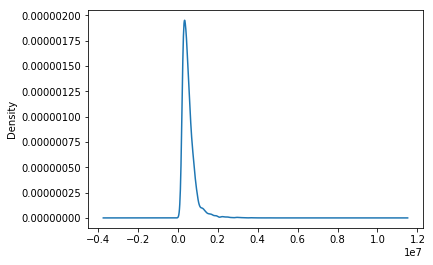

In [28]:
data['price'].plot(kind="kde")

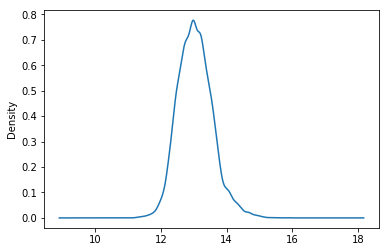

In [29]:
dt=np.log(data['price'])
dt.plot(kind='kde')

In [30]:
dt2=preprocessing.scale(dt)
dt2

array([-1.40093709,  0.28062405, -1.79828088, ..., -0.27219645,
       -0.28214334, -0.67639105])

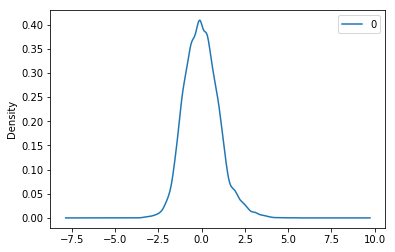

In [31]:
dt2=pd.DataFrame(dt2)
dt2.plot(kind='kde')

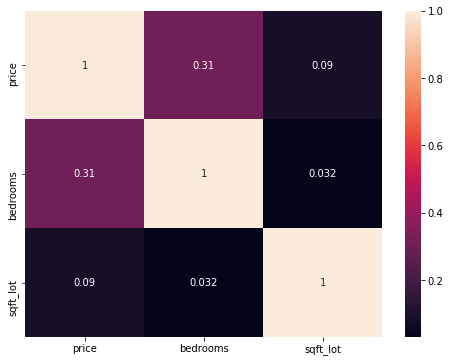

In [32]:
mlt.figure(figsize=(8,6)) 
sns.heatmap(data.corr(),annot=True)

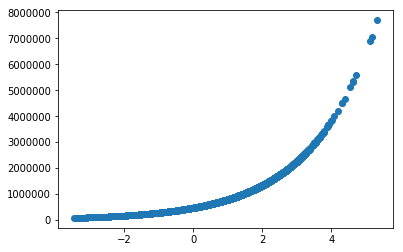

In [33]:
mlt.scatter(x = dt2 ,y = data['price'])

In [92]:
x = df[['bathrooms','sqft_living']]
y = df['price']

In [93]:
regr=LinearRegression()
regr.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [101]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.3)

In [102]:
regr.intercept_ , regr.coef_

(80910.01737129717, array([1.31688433e+05, 8.35698625e-01]))

In [103]:
Y_pred=regr.predict(X_test)
Y_pred

array([313303.59597588, 412838.76348002, 511471.37646967, ...,
       279203.15265877, 378938.8878328 , 213693.21559553])

In [104]:
a = pd.DataFrame({"actual":Y_test,"predicted":Y_pred})

In [105]:
a.insert(value = a.actual - a.predicted,column = "differences",loc = 2)

In [106]:
a

,actual,predicted,differences
7380,1070000.0,313303.595976,7.566964e+05
4202,654000.0,412838.763480,2.411612e+05
19205,695000.0,511471.376470,1.835286e+05
12805,515000.0,213475.933953,3.015241e+05
2431,306000.0,213250.295325,9.274970e+04
15234,450000.0,379256.453310,7.074355e+04
16144,610000.0,412621.481838,1.973785e+05
21319,452000.0,444975.315029,7.024685e+03
9240,412133.0,213367.293132,1.987657e+05
18907,676000.0,412471.056085,2.635289e+05


In [114]:
regr.score(X_test,Y_test)*100

-2.1622318390970063